# Test Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from my_measures import BinaryClassificationPerformance
from scipy.stats import zscore
%matplotlib inline

### Read raw test data

In [2]:
amazon = pd.read_csv('../amazon_data/raw_data_test.csv')
print(amazon.shape)

(91000, 14)


In [3]:
amazon['helpful'] = (amazon['helpScore']>=.67) & (amazon['HelpfulnessDenominator']>4)
# # print(amazon['helpful'])

In [4]:
amazon = amazon[np.isfinite(amazon['helpScore'])]
print(amazon.shape)

(47770, 14)


we are just running the training data for the test set.  The fit is done.  So we are applying that fit to the test data.  

In [5]:
print(amazon.head())
print(amazon['helpful'].mean())

    Unnamed: 0  Unnamed: 0.1      Id   ProductId          UserId  \
0       181267        413866  413867  B0026KPDG8  A3F8AMXZFG76OY   
1        13808        365696  365697  B003ENHSC8  A1OH76AX20G0BX   
5       353519        529250  529251  B0014DZQA6  A3SH3ZVXS16IBL   
6        41797        457780  457781  B001CHJ01A  A3BAMQO2TEG296   
10      412433        149737  149738  B005H6FF3Y   A7WV4HI6C8WRJ   

                            ProfileName  HelpfulnessNumerator  \
0                        Brenda Persson                     2   
1   Bank Of America "Hoping for Purity"                     3   
5                            Jeff Jones                     4   
6                       Dorothy "njsyd"                     1   
10                   Edward A. Woodward                    12   

    HelpfulnessDenominator  Score        Time  \
0                        2      5  1280102400   
1                        7      5  1216252800   
5                        6      1  1310256000   
6   

### Feature extraction on natural language data

In [6]:
# # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# corpus = amazon.Text.as_matrix()
# X_bag_of_words = vectorizer.fit_transform(corpus)
# print(X_bag_of_words.toarray())

In [7]:
# vectorize Bag of Words from review text; as sparse matrix
# from sklearn.feature_extraction.text import HashingVectorizer
# hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)

# from sklearn.feature_extraction.text import HashingVectorizer
# hv = HashingVectorizer(n_features=2 ** 17, non_negative=True, ngram_range=(1,3))
# X_hv = hv.fit_transform(amazon.Text)
# print(X_hv.shape)

hv = joblib.load('hv.pkl')
X_hv = hv.transform(amazon.Text)
print(X_hv.shape)



/Users/hubideal/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


(47770, 131072)


In [8]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
# from sklearn.feature_extraction.text import TfidfTransformer
# transformer = TfidfTransformer()
transformer = joblib.load('transformer.pkl')
X_tfidf = transformer.transform(X_hv)

In [9]:
print(type(X_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


### Create additional quantitative features

In [10]:
amazon['reviewLen'] = amazon['Text'].str.len()
amazon['summaryLen'] = amazon['Summary'].str.len()
amazon['wordCount'] = amazon['Text'].str.split().apply(len)

amazon['wordArray'] = amazon['Text'].str.split()
amazon['wordArrayLen'] = amazon['wordArray'].str.len()
amazon['userIdLen'] = amazon['UserId'].str.len()
amazon['idLen'] = amazon['Id']
amazon['profileLen'] = amazon['ProfileName'].str.len()
amazon['zScore'] = amazon['Score']
amazon['avgWord'] = amazon['reviewLen']/amazon['wordCount']

In [11]:
amazon['summaryLen'].fillna(0, inplace=True)
print(np.any(np.isnan(amazon['summaryLen'])))

False


In [12]:
amazon['profileLen'].fillna(0, inplace=True)
print(np.any(np.isnan(amazon['profileLen'])))

False


In [13]:
def word_counter(text):
    counter=0
    for word in text:
        if word == "is" or word == 'are' or word == "was" or word == "were" or word == "can" or word == "could" or word == "will" or word == "would" or word == "become" or word == "have" or word == "has" or word == "had":
            counter=counter+1
    return counter

amazon['wordCount'] = amazon['wordArray'].apply(word_counter)
amazon['passivePer'] = amazon['wordCount'] / amazon['wordArrayLen']



In [14]:
# def word_counter(text):
#     counter=0
#     for word in text:
#         if word == "excellent" or word == 'yum' or word == "good" or word == "dog" or word == "dogs" or word == "!" or word == "fantastic" or word == "helpful" or word == "product" or word == "bought" or word == "recommend":
#             counter=counter+1
#     return counter

# amazon['wordCount2'] = amazon['wordArray'].apply(word_counter)
# amazon['goodWords'] = amazon['wordCount2'] / amazon['wordArrayLen']


In [15]:
def word_capitalize(text):
    counter=0
    for word in text:
        #if word == 'tea' or word == 'get' or word == 'years' or word == 'oil' or word == 'cat' or word == 'quality' or word == 'milk' or word == 'less' or word == 'brand' or word == 'give' or word == 'lot' or word == 'stuff' or word == 'ingredients' or word == 'back':
        if  word == 'love' or word == 'taste' or word =='liked' or word =="n't" or word =='great' or word =='good' or word =='flavors' or word =='product' or word =='very' or word =='using' or word =='just' or word =='trying' or word =='buy' or word =='food' or word =='make' or word =='order' or word =='price' or word =='eating' or word =='time' or word =='best' or word =='really' or word =='only' or word =='amazon' or word =='little' or word =='stores' or word =="'ve" or word =='better' or word =='because' or word =='did' or word =='does' or word =="'m" or word =='any' or word =='br' or word =='br' or word =='verified' or word =='purchased': 
        #word == 'I' or word == 'you' or word == 'my' or word == 'like' or word == 'good' or word == 'one' or word == 'food' or word == 'all' or word == 'more' or word == 'very' or word == 'product' or word == 'taste' or word == 'out' or word == 'me' or word == 'flavor' or word == 'tea' or word == 'great' or word == 'coffee' or word == 'get' or word == 'up' or word == 'use' or word == 'only' or word == 'no' or word == 'much' or word == 'we' or word == 'little' or word == 'time' or word == 'love' or word == 'My' or word == 'too' or word == 'make' or word == 'tried' or word == 'Amazon' or word == 'find' or word == 'best' or word == 'better' or word == 'water' or word == 'price' or word == 'eat' or word == 'used' or word == 'dog' or word == 'buy' or word == 'now' or word == 'first' or word == 'try' or word == 'found' or word == 'We' or word == 'sugar' or word == 'cup' or word == 'then' or word == 'made' or word == 'over' or word == '2' or word == 'our' or word == 'day' or word == 'years' or word == 'oil' or word == 'chocolate' or word == 'cat' or word == 'know' or word == 'box' or word == 'bought' or word == 'think' or word == 'store' or word == 'go' or word == 'quality' or word == 'want' or word == 'recommend' or word == 'milk' or word == 'less' or word == 'mix' or word == 'never' or word == 'brand' or word == 'without' or word == 'every' or word == 'You' or word == 'sweet' or word == 'give' or word == 'lot' or word == 'again' or word == 'drink' or word == 'stuff' or word == 'order' or word == 'ingredients' or word == 'back' or word == 'got' or word == 'tastes' or word == '1' or word == 'makes' or word == 'say':
            counter=counter+1
                
    return counter

amazon['wordCapitalize'] = amazon['wordArray'].apply(word_capitalize)
amazon['capitalism'] = amazon['wordCapitalize'] / amazon['wordArrayLen']


In [16]:
# amazon['avgWord'] = zscore(amazon['avgWord'])
# amazon["Score"] = zscore(amazon["Score"])
# amazon["passivePer"] = zscore(amazon["passivePer"])
# amazon['capitalism'] = zscore(amazon['capitalism'])
# amazon["mystery"] = zscore(amazon['Unnamed: 0'])

In [17]:
# amazon['summaryLen'] = zscore(amazon['summaryLen'])
# amazon['profileLen'] = zscore(amazon['profileLen'])

In [18]:
# # features from Amazon.csv to add to feature set
# amazon['reviewLen'] = amazon['Text'].str.len()

# X_quant_features = amazon[["Score", "reviewLen"]]
# print(X_quant_features.head(10))
# print(type(X_quant_features))

# features from Amazon.csv to add to feature set
# amazon['reviewLen'] = amazon['Text'].str.len()
# amazon['profileLen'] = amazon['ProfileName'].str.len()
# amazon['profileLen'] = (amazon['ProfileName'].str.len())/1


# features from Amazon.csv to add to feature set
# amazon['reviewLen'] = amazon['Text'].str.len()
# amazon['profileLen'] = (amazon['ProfileName'].str.len())/1

X_quant_features = amazon[[ 'Score', 'avgWord', 'passivePer', 'capitalism']]
print(X_quant_features.head(10))
print(type(X_quant_features))

    Score   avgWord  passivePer  capitalism
0       5  5.277778    0.055556    0.111111
1       5  5.714286    0.142857    0.095238
5       1  5.354839    0.021505    0.032258
6       5  5.476190    0.047619    0.000000
10      1  5.389764    0.047244    0.035433
12      3  5.165217    0.086957    0.043478
14      5  6.064516    0.064516    0.064516
15      5  5.123711    0.051546    0.092784
16      3  5.065217    0.130435    0.086957
21      5  5.230769    0.076923    0.115385
<class 'pandas.core.frame.DataFrame'>


### Combine all quantitative features into a single sparse matrix

In [19]:
from scipy.sparse import csr_matrix, hstack
X_quant_features_csr = csr_matrix(X_quant_features)
X_combined = hstack([X_tfidf, X_quant_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(47770, 131076)


### Create `X`, scaled matrix of features

In [20]:
# feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler(with_mean=False)
sc = joblib.load('sc.pkl')
X = sc.transform(X_matrix)
print(X.shape)

(47770, 131076)


### create `y`, vector of Labels

In [21]:
y = amazon['helpful'].values
print(type(y))

<class 'numpy.ndarray'>


### predict `y` with the fit on the training set

Pickle fit matters here.  we are only predicting based on that fit.  Predict(x)

In [22]:
# # MODEL: SVM, linear
# from sklearn import linear_model
# svm = linear_model.SGDClassifier(alpha=.05)
# svm.fit(X, y)
# joblib.dump(svm, 'svm.pkl') # pickle

# svm_performance = BinaryClassificationPerformance(svm.predict(X), y, 'svm')
# svm_performance.compute_measures()
# print(svm_performance.performance_measures)


# MODEL: SVM, linear
# from sklearn import linear_model
# svm = linear_model.SGDClassifier()
# svm.fit(X, y)
# joblib.dump(svm, 'svm.pkl') # pickle
svm = joblib.load('svm.pkl') # pickle

svm_performance = BinaryClassificationPerformance(svm.predict(X), y, 'svm')
svm_performance.compute_measures()
print(svm_performance.performance_measures)

{'Pos': 7577, 'Neg': 40193, 'TP': 3570, 'TN': 35810, 'FP': 4383, 'FN': 4007, 'Accuracy': 0.82436675737910825, 'Precision': 0.44888721237268953, 'Recall': 0.47116272931239278, 'desc': 'svm'}


In [23]:
# MODEL: logistic regression
# from sklearn import linear_model
# lgs = linear_model.SGDClassifier(loss='log', n_iter=50, alpha=0.00001)
# lgs.fit(X, y)
# joblib.dump(lgs, 'lgs.pkl') # pickle
lgs = joblib.load('lgs.pkl')

lgs_performance = BinaryClassificationPerformance(lgs.predict(X), y, 'lgs')
lgs_performance.compute_measures()
print(lgs_performance.performance_measures)

{'Pos': 7577, 'Neg': 40193, 'TP': 3468, 'TN': 36718, 'FP': 3475, 'FN': 4109, 'Accuracy': 0.84123927150931543, 'Precision': 0.49949589514619042, 'Recall': 0.45770093704632442, 'desc': 'lgs'}


In [24]:
# MODEL: Naive Bayes
# from sklearn.naive_bayes import MultinomialNB
# nbs = MultinomialNB()
# nbs.fit(X, y)
# joblib.dump(nbs, 'nbs.pkl') # pickle
nbs = joblib.load('nbs.pkl')

nbs_performance = BinaryClassificationPerformance(nbs.predict(X), y, 'nbs')
nbs_performance.compute_measures()
print(nbs_performance.performance_measures)

{'Pos': 7577, 'Neg': 40193, 'TP': 3735, 'TN': 33710, 'FP': 6483, 'FN': 3842, 'Accuracy': 0.78386016328239483, 'Precision': 0.36553141514973575, 'Recall': 0.49293915797809157, 'desc': 'nbs'}


In [25]:
# MODEL: Ridge Regression Classifier
# from sklearn import linear_model
# rdg = linear_model.RidgeClassifier()
# rdg.fit(X, y)
# joblib.dump(rdg, 'rdg.pkl') # pickle
rdg = joblib.load('rdg.pkl')

rdg_performance = BinaryClassificationPerformance(rdg.predict(X), y, 'rdg')
rdg_performance.compute_measures()
print(rdg_performance.performance_measures)

{'Pos': 7577, 'Neg': 40193, 'TP': 2914, 'TN': 34984, 'FP': 5209, 'FN': 4663, 'Accuracy': 0.79334310236550132, 'Precision': 0.35873445771266771, 'Recall': 0.38458492807179623, 'desc': 'rdg'}


In [26]:
# # MODEL: Perceptron
# from sklearn import linear_model
# prc = linear_model.SGDClassifier(loss='perceptron', eta0=8, max_iter=3, alpha= .1)
# prc.fit(X, y)
# joblib.dump(prc, 'prc.pkl') # pickle
prc = joblib.load('prc.pkl')

prc_performance = BinaryClassificationPerformance(prc.predict(X), y, 'prc')
prc_performance.compute_measures()
print(prc_performance.performance_measures)

{'Pos': 7577, 'Neg': 40193, 'TP': 3594, 'TN': 36500, 'FP': 3693, 'FN': 3983, 'Accuracy': 0.8393133765961901, 'Precision': 0.49320708110333472, 'Recall': 0.47433020984558533, 'desc': 'prc'}


### ROC plot to compare performance of various models and fits

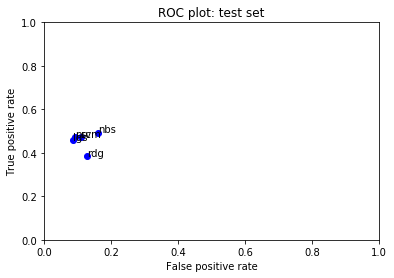

In [27]:
#fits = [svm_performance, lgs_performance,  rdg_performance, prc_performance]
fits = [svm_performance, lgs_performance, rdg_performance, nbs_performance, prc_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()